<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Binary Clasification: From scratch</h2>
<div>

### Imports

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs

### Plotting function

In [54]:
def plot_points(x,y): 
    plt.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="skyblue", label="zeros")
    plt.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="salmon", label="ones")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis("equal")
    plt.legend()
    #plt.show()

### Syntatic data: XOR

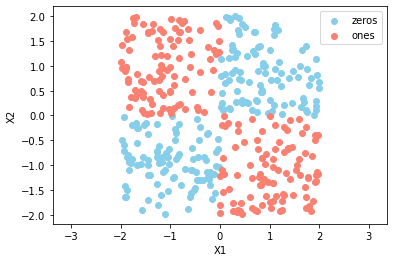

In [55]:
def xor_data(points:int, low, high):
    
    center = (high+low)/2   
    cluster_points = points // 4
    
    x1 = np.vstack(( np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)) ))

    x2 = np.vstack(( np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)) ))

    x = np.hstack((x1,x2))
    

    y = np.vstack(( np.zeros((cluster_points,1)),
                    np.ones((cluster_points,1)),
                    np.ones((cluster_points,1)),
                    np.zeros((cluster_points,1)) ))
    
    return x,y
    

x,y = xor_data(points=400, low=-2, high=2)
plot_points(x,y)

### TF

In [56]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Model
- Try `"relu"` and `"swish"`

In [57]:
inputs = keras.Input(shape=(2,), name="INPUT")
layer1 = layers.Dense(3, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_1')(inputs)
layer2 = layers.Dense(2, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_2')(layer1)
layer3 = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(layer2)

model = keras.Model(inputs=inputs, outputs=layer3)
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 3)                 9         
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 2)                 8         
_________________________________________________________________
OUTPUT (Dense)               (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
all_w1 = []
all_w2 = []
all_b1 = []
all_b2 = []

def save_weights_per_epoch(batch, logs):
    global all_w1
    global all_w2
    
    w1, b1 = model.layers[1].get_weights()
    w2, b2 = model.layers[2].get_weights()
    
    all_w1.append(w1)
    all_w2.append(w2)
    all_b1.append(b1)
    all_b2.append(b2)

In [59]:
model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y, epochs=400, batch_size=64, callbacks=[keras.callbacks.LambdaCallback(on_epoch_begin=save_weights_per_epoch)])

pred = model.predict(x)

#plot_3d(x, y_true, model(x))

Epoch 1/400
7/7 [==============================] - 0s 2ms/step - loss: 0.8797 - accuracy: 0.4500
Epoch 2/400
7/7 [==============================] - 0s 570us/step - loss: 0.6601 - accuracy: 0.5425
Epoch 3/400
7/7 [==============================] - 0s 892us/step - loss: 0.6300 - accuracy: 0.6150
Epoch 4/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.6325
Epoch 5/400
7/7 [==============================] - 0s 797us/step - loss: 0.6173 - accuracy: 0.6225
Epoch 6/400
7/7 [==============================] - 0s 781us/step - loss: 0.6130 - accuracy: 0.6225
Epoch 7/400
7/7 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6275
Epoch 8/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6067 - accuracy: 0.6350
Epoch 9/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.6375
Epoch 10/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.6475
Epoch 11/400
7/7 [===

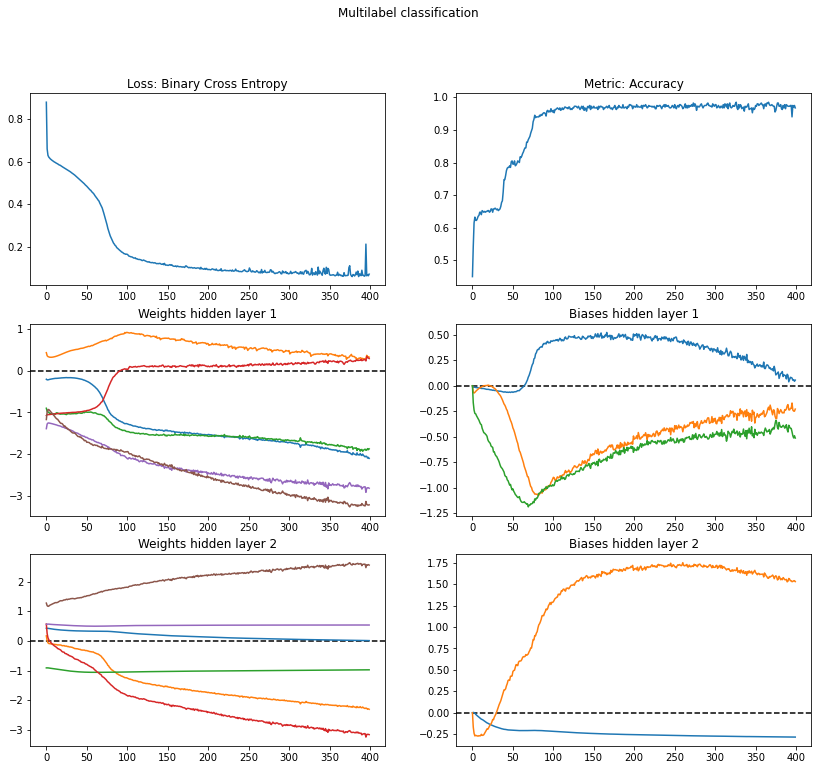

In [60]:
def plot_weights(weights, ax):
    weights = np.array(weights)
    ax.axhline(0, color='black', linestyle='dashed')
    for i in range(weights.shape[1]):
        for j in range(weights.shape[2]):
            ax.plot(weights[:,i,j])
    
def plot_biases(biases, ax):
    biases = np.array(biases)
    ax.axhline(0, color='black', linestyle='dashed')
    for i in range(biases.shape[1]):
        ax.plot(biases[:,i])


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
fig.suptitle('Multilabel classification')
    
ax[0,0].plot(train_hist.history["loss"])
ax[0,0].set_title("Loss: Binary Cross Entropy")

ax[0,1].plot(train_hist.history["accuracy"])
ax[0,1].set_title("Metric: Accuracy")

plot_weights(all_w1, ax[1,0])
ax[1,0].set_title("Weights hidden layer 1")

plot_biases(all_b1, ax[1,1])
ax[1,1].set_title("Biases hidden layer 1")

plot_weights(all_w2, ax[2,0])
ax[2,0].set_title("Weights hidden layer 2")

plot_biases(all_b2, ax[2,1])
ax[2,1].set_title("Biases hidden layer 2");

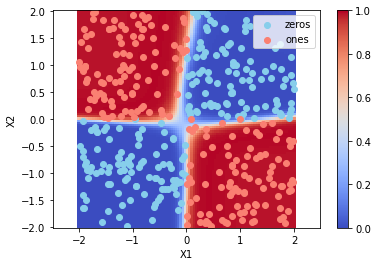

In [61]:
def plot_surface(minimum, maximun, resolution):

    x1_indexes = np.linspace(minimum, maximun, resolution)
    x2_indexes = np.linspace(minimum, maximun, resolution)

    x1, x2 = np.meshgrid(x1_indexes, x2_indexes)

    x = np.hstack(( x1.reshape(resolution*resolution,-1), x2.reshape(resolution*resolution,-1) ))

    y = model.predict(x).reshape(resolution, resolution)

    plt.pcolormesh(x1, x2, y, vmin=0, vmax=1, cmap="coolwarm", shading='auto')

    plt.colorbar()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis("equal")
    #plt.show()
    
plot_surface(minimum=-2, maximun=2, resolution=100)
plot_points(x,y)

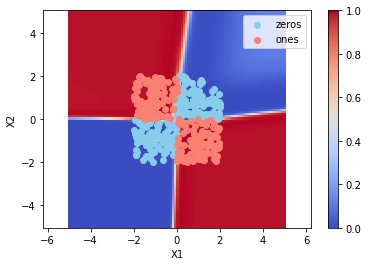

In [62]:
plot_surface(minimum=-5, maximun=5, resolution=100)
plot_points(x,y)

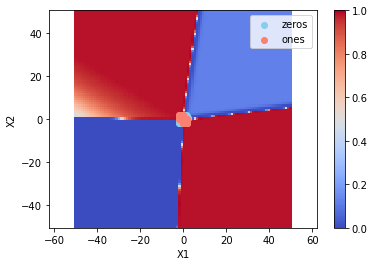

In [63]:
plot_surface(minimum=-50, maximun=50, resolution=100)
plot_points(x,y)